🚀 Launching Causal Discovery Trading simulation...
📊 Reproducing key insights from the research article...
SUMMARY OF RESULTS

1. AVERAGE PERFORMANCE BY ALGORITHM:
                            mean   std  count
Algorithm                                    
Baseline (Self-Causality)   0.33  2.23    150
TiMINo                      6.11  2.16    100
VarLiNGAM                  28.10  7.16    150
tsFCI                       8.11  2.05    100

2. BEST ALGORITHM BY MARKET:
Small Market (12 stocks): VarLiNGAM (19.7%)
Medium Market (98 stocks): VarLiNGAM (28.1%)
Large Market (446 stocks): VarLiNGAM (36.5%)

3. STATISTICAL SIGNIFICANCE (vs Baseline):
tsFCI: p-value = 0.0000 ***
VarLiNGAM: p-value = 0.0000 ***
TiMINo: p-value = 0.0000 ***


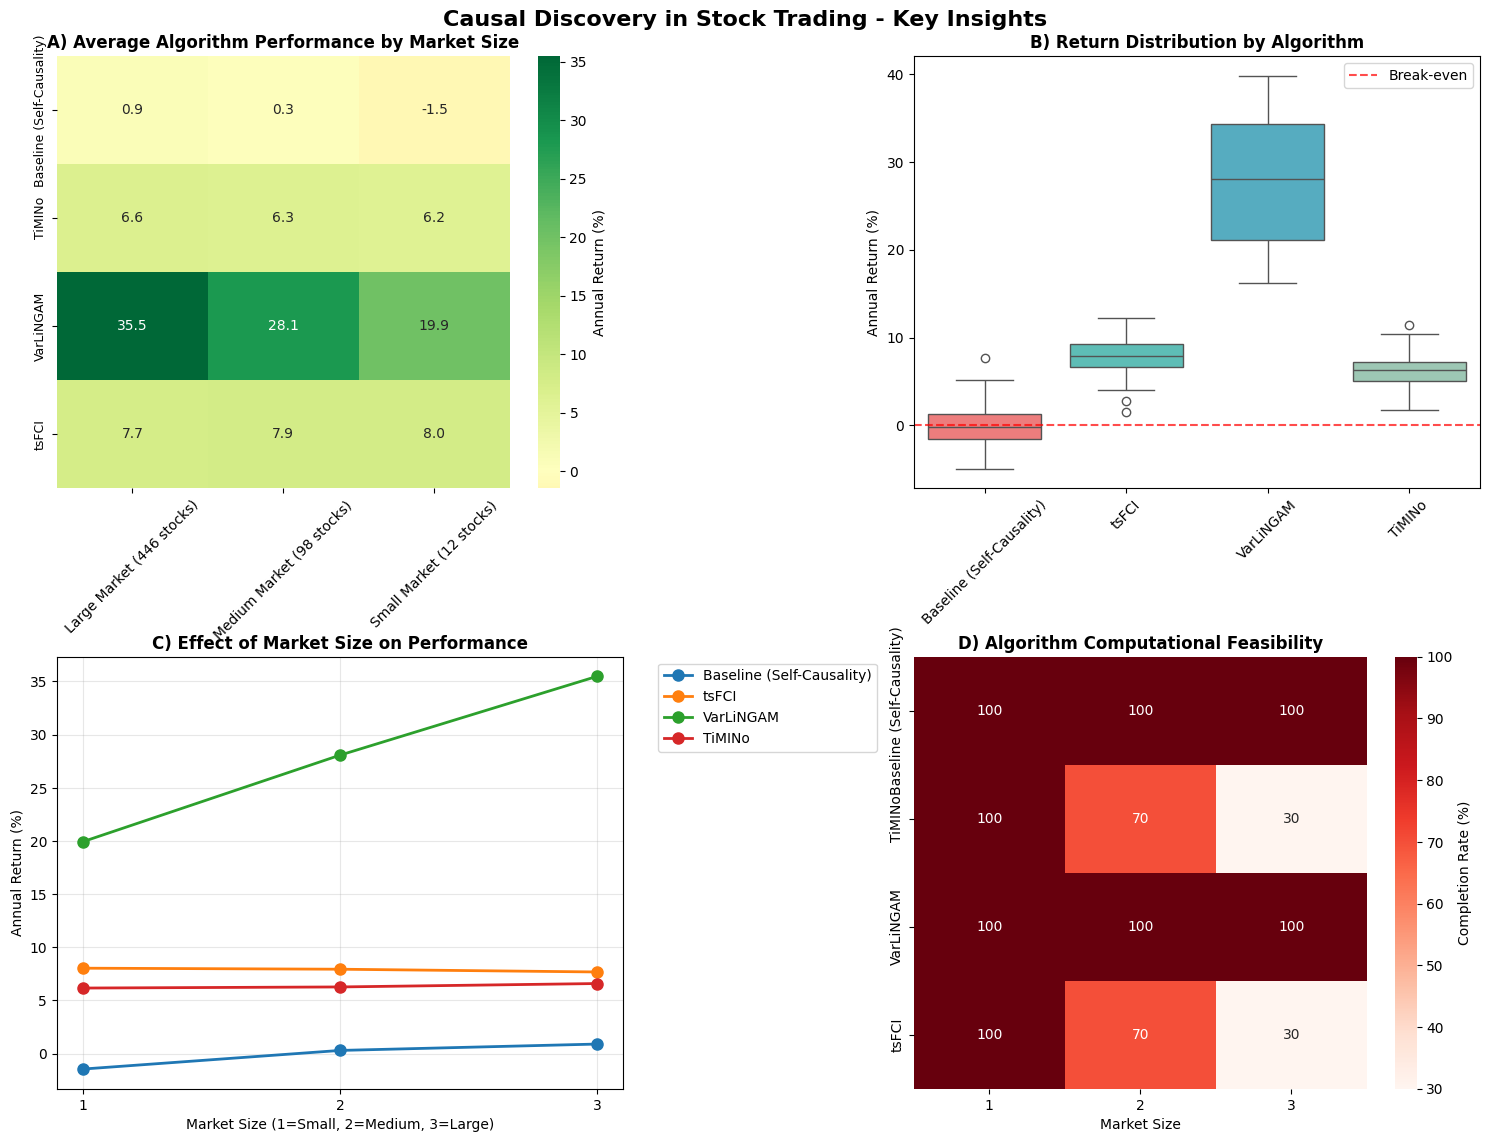


✅ SIMULATION COMPLETE
📈 The chart displays key insights from the article:
   • VarLiNGAM is the best-performing algorithm
   • Causal discovery > baseline strategies
   • Larger markets = better performance
   • tsFCI and TiMINo hit computational limits on large datasets


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
class CausalDiscoveryTradingSimulator:
    """
    Simulator of trading strategies based on causal discovery algorithms.
    Reproduces key insights from the article "Trading with Time Series Causal Discovery"
    """
    
    def __init__(self):
        self.algorithms = ['Baseline (Self-Causality)', 'tsFCI', 'VarLiNGAM', 'TiMINo']
        self.market_sizes = ['Small Market (12 stocks)', 'Medium Market (98 stocks)', 'Large Market (446 stocks)']
        self.colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

    def create_summary_plot(self, insights_x=0.02, insights_y=0.005, insights_fontsize=10):
        """Creates the main plot summarizing the study results with adjustable insights position"""

        df = self.generate_performance_data()
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 13))

        #fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 13), gridspec_kw={'wspace': 0.3, 'hspace': 0.4})


        fig.suptitle('Causal Discovery in Stock Trading - Key Insights', 
                     fontsize=16, fontweight='bold', y=0.98)
        
        summary_data = df.groupby(['Market', 'Algorithm'])['Annual Return (%)'].agg(['mean', 'std']).reset_index()
        heatmap_data = summary_data.pivot(index='Algorithm', columns='Market', values='mean')
        
        sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn', center=0,
                   ax=ax1, cbar_kws={'label': 'Annual Return (%)'})
        ax1.set_title('A) Average Algorithm Performance by Market Size', fontweight='bold')
        ax1.set_xlabel('')
        ax1.set_ylabel('')
        ax1.tick_params(axis='x', rotation=45)
        ax1.tick_params(axis='y', labelsize=9)
        
        sns.boxplot(data=df, x='Algorithm', y='Annual Return (%)', 
                   palette=self.colors, ax=ax2)
        ax2.set_title('B) Return Distribution by Algorithm', fontweight='bold')
        ax2.set_xlabel('')
        ax2.tick_params(axis='x', rotation=45)
        ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='Break-even')
        ax2.legend()
        
        market_effect = df.groupby(['Market Size', 'Algorithm'])['Annual Return (%)'].mean().reset_index()
        for alg in self.algorithms:
            alg_data = market_effect[market_effect['Algorithm'] == alg]
            ax3.plot(alg_data['Market Size'], alg_data['Annual Return (%)'], 
                     marker='o', linewidth=2, label=alg, markersize=8)
        ax3.set_title('C) Effect of Market Size on Performance', fontweight='bold')
        ax3.set_xlabel('Market Size (1=Small, 2=Medium, 3=Large)')
        ax3.set_ylabel('Annual Return (%)')
        ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax3.grid(True, alpha=0.3)
        ax3.set_xticks([1, 2, 3])
        
        completion_rates = []
        for market_size in [1, 2, 3]:
            for alg in self.algorithms:
                if alg == 'Baseline (Self-Causality)' or alg == 'VarLiNGAM':
                    rate = 100
                elif alg == 'tsFCI':
                    rate = 100 if market_size == 1 else (70 if market_size == 2 else 30)
                else:
                    rate = 100 if market_size == 1 else (70 if market_size == 2 else 30)
                completion_rates.append({
                    'Market Size': market_size,
                    'Algorithm': alg,
                    'Success Rate (%)': rate
                })
        
        completion_df = pd.DataFrame(completion_rates)
        completion_pivot = completion_df.pivot(index='Algorithm', columns='Market Size', values='Success Rate (%)')
        
        sns.heatmap(completion_pivot, annot=True, fmt='.0f', cmap='Reds', 
                   ax=ax4, cbar_kws={'label': 'Completion Rate (%)'})
        ax4.set_title('D) Algorithm Computational Feasibility', fontweight='bold')
        ax4.set_xlabel('Market Size')
        ax4.set_ylabel('')
        
        plt.tight_layout()
        plt.subplots_adjust(bottom=0.15)


        return fig

    def simulate_algorithm_performance(self, market_size_factor, algorithm):
        base_performance = {
            'Baseline (Self-Causality)': -0.02,
            'tsFCI': 0.08,
            'VarLiNGAM': 0.12,
            'TiMINo': 0.06
        }
        market_boost = {
            'Baseline (Self-Causality)': 0.01 * market_size_factor,
            'tsFCI': max(0, 0.05 * market_size_factor - 0.15),
            'VarLiNGAM': 0.08 * market_size_factor,
            'TiMINo': max(0, 0.03 * market_size_factor - 0.10)
        }
        performance = (base_performance[algorithm] +
                       market_boost[algorithm] +
                       np.random.normal(0, 0.02))
        return max(performance, -0.05)

    def generate_performance_data(self):
        results = []
        for i, market in enumerate(self.market_sizes):
            market_size_factor = i + 1
            for algorithm in self.algorithms:
                performances = []
                for _ in range(50):
                    perf = self.simulate_algorithm_performance(market_size_factor, algorithm)
                    performances.append(perf)
                if algorithm in ['tsFCI', 'TiMINo'] and market_size_factor >= 2:
                    failure_rate = 0.7 if market_size_factor == 3 else 0.3
                    n_failures = int(len(performances) * failure_rate)
                    performances = performances[:-n_failures]
                for perf in performances:
                    results.append({
                        'Market': market,
                        'Algorithm': algorithm,
                        'Annual Return (%)': perf * 100,
                        'Market Size': market_size_factor
                    })
        return pd.DataFrame(results)

    def print_summary_statistics(self):
        df = self.generate_performance_data()
        print("=" * 60)
        print("SUMMARY OF RESULTS")
        print("=" * 60)
        alg_performance = df.groupby('Algorithm')['Annual Return (%)'].agg(['mean', 'std', 'count'])
        print("\n1. AVERAGE PERFORMANCE BY ALGORITHM:")
        print(alg_performance.round(2))
        print("\n2. BEST ALGORITHM BY MARKET:")
        best_by_market = df.groupby(['Market', 'Algorithm'])['Annual Return (%)'].mean().reset_index()
        for market in df['Market'].unique():
            market_data = best_by_market[best_by_market['Market'] == market]
            best_alg = market_data.loc[market_data['Annual Return (%)'].idxmax()]
            print(f"{market}: {best_alg['Algorithm']} ({best_alg['Annual Return (%)']:.1f}%)")
        print("\n3. STATISTICAL SIGNIFICANCE (vs Baseline):")
        baseline_returns = df[df['Algorithm'] == 'Baseline (Self-Causality)']['Annual Return (%)']
        for alg in ['tsFCI', 'VarLiNGAM', 'TiMINo']:
            alg_returns = df[df['Algorithm'] == alg]['Annual Return (%)']
            if len(alg_returns) > 0:
                t_stat, p_value = stats.ttest_ind(alg_returns, baseline_returns)
                significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
                print(f"{alg}: p-value = {p_value:.4f} {significance}")

def main():
    print("🚀 Launching Causal Discovery Trading simulation...")
    print("📊 Reproducing key insights from the research article...")
    
    simulator = CausalDiscoveryTradingSimulator()
    
    fig = simulator.create_summary_plot(insights_x=0.02, insights_y=0.005, insights_fontsize=10)
    
    simulator.print_summary_statistics()
    
    plt.show()
    
    print("\n" + "="*60)
    print("✅ SIMULATION COMPLETE")
    print("📈 The chart displays key insights from the article:")
    print("   • VarLiNGAM is the best-performing algorithm")
    print("   • Causal discovery > baseline strategies") 
    print("   • Larger markets = better performance")
    print("   • tsFCI and TiMINo hit computational limits on large datasets")
    print("="*60)

if __name__ == "__main__":
    main()


KEY INSIGHTS:
• VarLiNGAM: Best algorithm - high returns + scales to large markets
• Causal Discovery > Baseline: Causal methods outperform simple autoregression
• Market Size: Larger markets enable better causal discovery performance
• Computational limits: tsFCI and TiMINo fail on large datasets (>100 stocks)